# Lab  7 - Introduction to Pytorch

##### Keywords: gradient descent, logistic regression, pytorch, sgd, minibatch sgd
##### Data: data/iris_dataset.pickle

## Contents
{:.no_toc}
* 
{: toc}

## Learning Aims

- Introduction to PyTorch
- Linear regression
- Logistic regression
- Automatic differentiation
- Gradient descent

## Lab Trajectory

- PyTorch Installation
- Why PyTorch?
- Working with PyTorch Basics
- Linear Regression
- DataLoaders
- Logistic Regression on MNIST

## Installing PyTorch

### Installation

#### OS X/Linux 
We shall be using PyTorch in this class.  Please go to the PyTorch website where they have a nicely designed interface that will generate for you the appropriate installation instructions depending on your OS (Linux/OS X/Windows), your package management system (pip/conda) and your CUDA install (8/9/none).  http://pytorch.org.  Your installation instructions will look something like:

- conda install pytorch torchvision -c pytorch 

or

- pip3 install http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
- pip3 install torchvision

#### Windows
PyTorch doesn't have official Windows support as yet, but there are Windows binaries available due to Github user @peter123.  Please see his PyTorch for Windows repo https://github.com/peterjc123/pytorch-scripts for installation instructions for different versions of Windows and CUDA.  In all likelihood your installation instructions will be:

- conda install pytorch-cpu -c pytorch
- pip install torchvision


### Testing Installation

If the code cell below shows an error, then your PyTorch installation is not working and you should contact one of the teaching staff.

In [3]:
import numpy as np

In [43]:
### Code Cell to Test PyTorch

import torch
print("PyTorch version: ".format(torch.__version__))
import torchvision
import torchvision.transforms as transforms
print("Torchvision version: ".format(torchvision.__version__))

print("Creating a Tensor!!")
x = torch.rand(5, 3)
print(x)

transforms.RandomRotation(0.7)
transforms.RandomRotation([0.9, 0.2])

t = transforms.RandomRotation(10)
angle = t.get_params(t.degrees)

print("Testing some PyTorch transformations!!")
print(angle)


PyTorch version: 
Torchvision version: 
Creating a Tensor!!
tensor([[0.8398, 0.8476, 0.1794],
        [0.9282, 0.7939, 0.2906],
        [0.5745, 0.7389, 0.1682],
        [0.5469, 0.3886, 0.1154],
        [0.0025, 0.1830, 0.7606]])
Testing some PyTorch transformations!!
-3.6506759986351494


## Why PyTorch?

*All the quotes will come from the PyTorch About Page http://pytorch.org/about/ from which I'll plagiarize shamelessly.  After all, who better to tout the virtues of PyTorch than the creators?*


### What is PyTorch?

According to the PyTorch about page, "PyTorch is a python package that provides two high-level features:

- Tensor computation (like numpy) with strong GPU acceleration
- Deep Neural Networks built on a tape-based autograd system"

### Why is it getting so popular?

#### It's quite fast

"PyTorch has minimal framework overhead. We integrate acceleration libraries such as Intel MKL and NVIDIA (CuDNN, NCCL) to maximize speed. At the core, it’s CPU and GPU Tensor and Neural Network backends (TH, THC, THNN, THCUNN) are written as independent libraries with a C99 API.
They are mature and have been tested for years.

Hence, PyTorch is quite fast – whether you run small or large neural networks."

#### Imperative programming experience

"PyTorch is designed to be intuitive, linear in thought and easy to use. When you execute a line of code, it gets executed. There isn’t an asynchronous view of the world. When you drop into a debugger, or receive error messages and stack traces, understanding them is straight-forward. The stack-trace points to exactly where your code was defined. We hope you never spend hours debugging your code because of bad stack traces or asynchronous and opaque execution engines."

"PyTorch is not a Python binding into a monolothic C++ framework. It is built to be deeply integrated into Python. You can use it naturally like you would use numpy / scipy / scikit-learn etc. You can write your new neural network layers in Python itself, using your favorite libraries and use packages such as Cython and Numba. Our goal is to not reinvent the wheel where appropriate."

#### Takes advantage of GPUs easily

"PyTorch provides Tensors that can live either on the CPU or the GPU, and accelerate compute by a huge amount.

We provide a wide variety of tensor routines to accelerate and fit your scientific computation needs such as slicing, indexing, math operations, linear algebra, reductions. And they are fast!"


#### Dynamic Graphs!!!

"Most frameworks such as TensorFlow, Theano, Caffe and CNTK have a static view of the world. One has to build a neural network, and reuse the same structure again and again. Changing the way the network behaves means that one has to start from scratch.

With PyTorch, we use a technique called Reverse-mode auto-differentiation, which allows you to change the way your network behaves arbitrarily with zero lag or overhead. Our inspiration comes from several research papers on this topic, as well as current and past work such as autograd, autograd, Chainer, etc.

While this technique is not unique to PyTorch, it’s one of the fastest implementations of it to date. You get the best of speed and flexibility for your crazy research."



## Working with PyTorch Constructs

Enough of the sales pitch!  Let's start to understand the PyTorch basics.

The basic unit of PyTorch is a tensor (basically a multi-dimensional array like a np.ndarray).

![](https://cdn-images-1.medium.com/max/2000/1*_D5ZvufDS38WkhK9rK32hQ.jpeg)

(image borrowed from https://hackernoon.com/learning-ai-if-you-suck-at-math-p4-tensors-illustrated-with-cats-27f0002c9b32 )

In fact the big difference between a PyTorch Tensor and a numpy ndarray is that a tensor has some extra functionality that allows it to operate both on the GPU and the CPU.

### Working with Tensors

We have many different ways to create tensors.  Most of them allow creation of tensors from existing numpy objects.

In [44]:

## You can create torch.Tensor objects by giving them data directly

#  1D vector
vector_input = [1, 2, 3, 4, 5, 6]
vector1 = torch.Tensor(vector_input)

## this is the right way!!
vector2 = torch.tensor(vector_input)

# Matrix
matrix_input = [[1., 2., 3.], [4., 5., 6]]
matrix = torch.tensor(matrix_input)


# Create a 3D tensor of size 2x2x2.
tensor_input = [[[1., 2.], [3., 4.]],
          [[5., 6.], [7., 8.]]]
tensor3d = torch.Tensor(tensor_input)

matrix2 = torch.clone(matrix) + matrix
tensor3d_2 = torch.stack((matrix, matrix2))

print("Vector 1:", vector1)
print("Vector 2:", vector2)
print("Matrix Tensor:", matrix)
print("Tensor 3D", tensor3d)
print("Another Tensor 3D", tensor3d_2)


Vector 1: tensor([1., 2., 3., 4., 5., 6.])
Vector 2: tensor([1, 2, 3, 4, 5, 6])
Matrix Tensor: tensor([[1., 2., 3.],
        [4., 5., 6.]])
Tensor 3D tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
Another Tensor 3D tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.]],

        [[ 2.,  4.,  6.],
         [ 8., 10., 12.]]])


They can be created without any initialization or initialized with random data from uniform (rand()) or normal (randn()) distributions

In [45]:
# Tensors with no initialization
x_1 = torch.Tensor(2, 5)
y_1 = torch.Tensor(3, 5)
print("x_1: ", x_1)
print("y_1: ", y_1)

# Tensors initialized from uniform
x_2 = torch.rand(5, 3, 5)
y_2 = torch.rand(5, 5)

print("x_2: ", x_2)
print("y_2: ", y_2)

# Tensors initialized from normal
x_3 = torch.randn(5, 3)
y_3 = torch.randn(5, 5)

print("x_3: ", x_3)
print("y_3: ", y_3)

x_1:  tensor([[        -4157.6094,             0.0000, -956742762496.0000,
                     0.0000,             0.0000],
        [            0.0000,            -0.0000,             3.5400,
                     0.0000,             0.0000]])
y_1:  tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
x_2:  tensor([[[0.3022, 0.6083, 0.9035, 0.3849, 0.5932],
         [0.6945, 0.0727, 0.0334, 0.7324, 0.9299],
         [0.9877, 0.6098, 0.8646, 0.2585, 0.5462]],

        [[0.8714, 0.7585, 0.0224, 0.1210, 0.6492],
         [0.7242, 0.5131, 0.5688, 0.3411, 0.5555],
         [0.2097, 0.9618, 0.8698, 0.1844, 0.3064]],

        [[0.1600, 0.6870, 0.8208, 0.9726, 0.5925],
         [0.5087, 0.7049, 0.1693, 0.0878, 0.9016],
         [0.0398, 0.4439, 0.5795, 0.6016, 0.6025]],

        [[0.3661, 0.3169, 0.4851, 0.6079, 0.1566],
         [0.2024, 0.8286, 0.5650, 0.0685, 0.9789],
         [0.6596, 0.8497,

So far it seems numpy like as promised.  Is there any difference?  Let's pick one of the tensors above and examine it.

In [46]:
type(x_1)

torch.Tensor

It is indeed a tensor.  What about length and size?

In [47]:
# Expect (2,5)
print("Size: ", x_1.size())
print("Shape: ", x_1.shape)
print("Length: ", len(x_1))

# just as a reminder
print(x_1)

print(x_1.device)


Size:  torch.Size([2, 5])
Shape:  torch.Size([2, 5])
Length:  2
tensor([[        -4157.6094,             0.0000, -956742762496.0000,
                     0.0000,             0.0000],
        [            0.0000,            -0.0000,             3.5400,
                     0.0000,             0.0000]])
cpu


So len works as normal, size() gives a torch version of size, and shape is an alias for size.  Most important

The expected operations (arithmetic operations, addressing, etc) are all in place.

In [48]:
# Addition
print(x_2)
print(x_3)

print(x_2+ x_3)

# Addressing
print(x_3[:, 2])

tensor([[[0.3022, 0.6083, 0.9035, 0.3849, 0.5932],
         [0.6945, 0.0727, 0.0334, 0.7324, 0.9299],
         [0.9877, 0.6098, 0.8646, 0.2585, 0.5462]],

        [[0.8714, 0.7585, 0.0224, 0.1210, 0.6492],
         [0.7242, 0.5131, 0.5688, 0.3411, 0.5555],
         [0.2097, 0.9618, 0.8698, 0.1844, 0.3064]],

        [[0.1600, 0.6870, 0.8208, 0.9726, 0.5925],
         [0.5087, 0.7049, 0.1693, 0.0878, 0.9016],
         [0.0398, 0.4439, 0.5795, 0.6016, 0.6025]],

        [[0.3661, 0.3169, 0.4851, 0.6079, 0.1566],
         [0.2024, 0.8286, 0.5650, 0.0685, 0.9789],
         [0.6596, 0.8497, 0.5658, 0.8673, 0.4842]],

        [[0.2704, 0.8897, 0.4086, 0.7123, 0.1331],
         [0.6559, 0.0301, 0.0695, 0.7726, 0.5957],
         [0.7487, 0.0169, 0.3050, 0.7395, 0.9629]]])
tensor([[ 1.8029, -3.0177, -0.3427],
        [-1.6123,  0.3479, -0.1397],
        [ 2.5883,  2.4578, -1.1001],
        [ 0.0568,  0.6750,  0.5069],
        [ 0.9508,  0.0645, -0.1539]])


RuntimeError: The size of tensor a (5) must match the size of tensor b (3) at non-singleton dimension 2

It's easy to move between PyTorch and Numpy worlds with numpy() and torch.from_numpy()

In [49]:
# PyTorch --> Numpy
print(x_1)
print(x_1.numpy())

print(type(x_1))
print(type(x_1.numpy()))

numpy_x_1 = x_1.numpy()
pytorch_x_1 = torch.from_numpy(numpy_x_1)

print(type(numpy_x_1))
print(type(pytorch_x_1))

tensor([[        -4157.6094,             0.0000, -956742762496.0000,
                     0.0000,             0.0000],
        [            0.0000,            -0.0000,             3.5400,
                     0.0000,             0.0000]])
[[-4.1576094e+03  7.7211545e-43 -9.5674276e+11  7.7211545e-43
   0.0000000e+00]
 [ 0.0000000e+00 -0.0000000e+00  3.5399582e+00  3.4954427e-27
   1.1981747e-27]]
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


Finally PyTorch provides some convenience mechanisms for concatenating Tensors via torch.cat() and reshaping them with  .view() 

In [50]:
## Concatenating

# By default, it concatenates along the first axis (concatenates rows)
x_1 = torch.randn(2, 5)
y_1 = torch.randn(3, 5)
z_1 = torch.cat([x_1, y_1])
print(z_1)

# Concatenate columns:
x_2 = torch.randn(2, 3)
y_2 = torch.randn(2, 5)
# second arg specifies which axis to concat along
z_2 = torch.cat([x_2, y_2], 1)
print(z_2)

## Reshaping
x = torch.randn(2, 3, 4)
print(x)
print(x.view(2, 12))  # Reshape to 2 rows, 12 columns
# Same as above.  If one of the dimensions is -1, its size can be inferred
print(x.view(2, -1))

tensor([[-0.3080, -0.1747, -1.3863,  0.2436,  0.7147],
        [-1.9157,  0.5828,  1.0790,  0.1604,  0.7169],
        [ 0.6488, -0.2555,  0.2771,  2.5440,  0.9944],
        [ 1.1408, -0.3769,  1.9550, -3.2626,  0.5534],
        [ 0.2787,  0.9282, -1.9147, -0.8204, -0.2387]])
tensor([[ 1.8382, -0.6968, -0.5795, -0.3001, -0.7851,  0.9465, -0.1179, -1.7544],
        [-0.2307, -0.2835, -0.6666,  0.4455,  0.2412, -1.7263, -0.6808,  1.1152]])
tensor([[[-1.1511, -0.8146,  0.4807,  0.4451],
         [-0.8166,  0.7693, -1.3763,  0.5066],
         [ 0.3267, -0.1902,  0.7155, -0.0930]],

        [[-0.9012, -2.1802,  0.2653,  0.3552],
         [ 0.7897, -0.6655, -1.6955,  1.2046],
         [-1.0640, -0.0554,  0.1177, -1.0901]]])
tensor([[-1.1511, -0.8146,  0.4807,  0.4451, -0.8166,  0.7693, -1.3763,  0.5066,
          0.3267, -0.1902,  0.7155, -0.0930],
        [-0.9012, -2.1802,  0.2653,  0.3552,  0.7897, -0.6655, -1.6955,  1.2046,
         -1.0640, -0.0554,  0.1177, -1.0901]])
tensor([[-1.1511, 

Ok -- in order to understand variables in PyTorch, let's take a break and learn about Artificial Neural Networks.

## PyTorch Variables and the Computational Graph

Ok -- back to PyTorch.

The other fundamental PyTorch construct besides Tensors are Variables.  Variables are very similar to tensors, but they also keep track of the graph (including their gradients for autodifferentiation).  They are defined in the autograd module of torch.

In [51]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

# Let's create a variable by initializing it with a tensor
first_tensor = torch.Tensor([23.3])

first_variable = Variable(first_tensor, requires_grad=True)

print("first variables gradient: ", first_variable.grad)
print("first variables data: ", first_variable.data)



first variables gradient:  None
first variables data:  tensor([23.3000])


Now let's create some new variables. We can do so implicitly just by creating other variables with functional relationships to our variable.

In [52]:
x = first_variable
y = (x ** x) * (x - 2) # y is a variable
z = F.tanh(y) # z has a functional relationship to y, it's a variable
z.backward()

print("y.data: ", y.data)
print("y.grad: ", y.grad)

print("z.data: ", z.data)
print("z.grad: ", z.grad)

print("x.grad:", x.grad)



y.data:  tensor([1540888416214288714427369179316224.])
y.grad:  None
z.data:  tensor([1.])
z.grad:  None
x.grad: tensor([0.])


C:\Python\Anaconda3\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Variables come with a .backward() that allows them to do autodifferentiation via backwards propagation.  

## Constructing a model with PyTorch

Constructing a model with PyTorch is based on a design pattern with a fairly repeatable three step process:

- Design your model (including relationships between your variables)
    - Generally done by defining a subclass of torch.nn.Module
- Construct your loss and optimizer
- Train your model using your optimizer and forwards and backwards steps in your model

In [15]:
from sklearn.datasets import make_regression
import numpy as np
np.random.seed(99)
x1_data, y1_data, coef = make_regression(30,10, 10, bias=1, noise=2, coef=True)

In [16]:
y1_data = y1_data.reshape(-1,1)

In [17]:
#matplotlib

import matplotlib
import matplotlib.pyplot as plt

In [18]:
import torch
from torch.autograd import Variable

x_data = Variable(torch.Tensor(x1_data))
y_data = Variable(torch.Tensor(y1_data))

print(x_data.shape)

class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(10, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred

# our model
model = Model()


# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
    
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    
    if (not epoch % 25):
        print(epoch, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# After training
ytrain_pred = model(x_data)


torch.Size([30, 10])
0 tensor(722936.6250)
25 tensor(68.1224)
50 tensor(59.1884)
75 tensor(59.1842)
100 tensor(59.1844)
125 tensor(59.1842)
150 tensor(59.1840)
175 tensor(59.1841)
200 tensor(59.1842)
225 tensor(59.1840)
250 tensor(59.1841)
275 tensor(59.1842)
300 tensor(59.1840)
325 tensor(59.1841)
350 tensor(59.1842)
375 tensor(59.1840)
400 tensor(59.1841)
425 tensor(59.1842)
450 tensor(59.1840)
475 tensor(59.1841)


C:\Python\Anaconda3\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [19]:
model.parameters()

<generator object Module.parameters at 0x00000227CD827A40>

## DataLoaders

In [20]:
from IPython.lib.display import YouTubeVideo

from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.sampler import SubsetRandomSampler

### Defining our Dataset

We'll start by defining a dataset not too disimilar to MNIST but a lot simpler.  We replace our (28, 28, 1) ndarrays with (2, 2, 1) versions.  We also implement the ability to handle transforms just so our class fits in with the MNIST-like Dataset/DataLoader scaffolding in torch/torchvision.

In [29]:
class MyCustomPixelDataset(Dataset):
    """
    This dataset is a toy dataset that acts like 2x2 version of MNIST
    with the trace as labels.
    """
    def __init__(self, size=1, transform=None):
        super(MyCustomPixelDataset, self).__init__()
        
        # size determines length of dataset
        self.size = size
        
        # generate random 2x2 matrices with values in [0, 255]
        self.matrices = [np.random.randint(256, size=(2, 2)) for i in range(self.size)]
        
        # our dataset will be a list of (ndarray, label) tuples where the label is the trace
        # reshape our matrices into (2x2x1) ndarrays so that transforms.ToTensor()
        # has the appropriate expected shape
        self.matrices = [(np.reshape(np.array([matrix]), (2,2,1)), np.trace(matrix)) for matrix in self.matrices]
        
        # if we're passed a transform then apply it to the first element of our tuple (the input)
        if transform:
            self.matrices = [(transform(element[0]), element[1]) for element in self.matrices]
        
    # length should just be the size although we don't validate size (i.e. should be an int > 0)
    def __len__(self):
        return self.size
    
    # implement __getitem__ as the indexed tuple 
    def __getitem__(self, index):
        #assert 0 <= index <= self.b - self.a
        
        return self.matrices[index]

**If we look at an example small instance of our dataset, we see that it correctly handles the transforms.ToTensor() operation and matches the structure of the MNIST dataset although we have scalar labels as the trace of the original random 2x2 matrix**

In [30]:
mydset = MyCustomPixelDataset(12,transform=transforms.ToTensor())

In [31]:
mydset[:]

[(tensor([[[132, 179],
           [198,  31]]], dtype=torch.int32), 163), (tensor([[[252, 239],
           [216, 225]]], dtype=torch.int32), 477), (tensor([[[236,  45],
           [ 83, 183]]], dtype=torch.int32), 419), (tensor([[[179, 233],
           [155, 222]]], dtype=torch.int32), 401), (tensor([[[247,  91],
           [ 41, 160]]], dtype=torch.int32), 407), (tensor([[[ 33, 172],
           [ 95, 135]]], dtype=torch.int32), 168), (tensor([[[212,  91],
           [ 37, 167]]], dtype=torch.int32), 379), (tensor([[[204, 206],
           [170, 178]]], dtype=torch.int32), 382), (tensor([[[196,  14],
           [194,  29]]], dtype=torch.int32), 225), (tensor([[[85, 49],
           [75, 13]]], dtype=torch.int32), 98), (tensor([[[18, 62],
           [98, 71]]], dtype=torch.int32), 89), (tensor([[[ 70,  62],
           [ 51, 109]]], dtype=torch.int32), 179)]

### Defining our DataLoader

We'll now define a DataLoader with a batch_size of 4 and shuffle set to be True.  If things go as expected when we loop through our epochs (we only define two here just to show the functionality) and iterate through the DataLoader, we should see our batches of 4 and they shouldn't come out in a defined order.  Our data should come out in different orders (and different batches) in each epoch.

In [32]:
mydset_loader = torch.utils.data.DataLoader(dataset=mydset, 
                                           batch_size=4, 
                                           shuffle=True)

In [33]:
for epoch in range(2):   
    for batch_index, (inputs, labels) in enumerate(mydset_loader):
        print(epoch, batch_index, labels)

0 0 tensor([225, 419,  89, 477], dtype=torch.int32)
0 1 tensor([407, 179, 401, 379], dtype=torch.int32)
0 2 tensor([382,  98, 168, 163], dtype=torch.int32)
1 0 tensor([379, 407, 401, 168], dtype=torch.int32)
1 1 tensor([419, 477,  89, 225], dtype=torch.int32)
1 2 tensor([163, 382,  98, 179], dtype=torch.int32)


Sure enough our label clusters come in different orders and organized in different batchs in each epoch.

### Splitting out a Validation Set from our Dataset

Our problem is that we're given a dataset but not necessary a validation set.  How do we split out a validation set while still being able to use the convenient dataset/dataloader scaffolding that PyTorch provides?

We'll take the following approach:

* Split our dataset into training set and validation set
* Use the indices of the split to create PyTorch Samplers
* Feed that sampler into our DataLoaders to tell them which dataset elements to include in their iteration
* Iterate over the appropriate DataLoaders in the training/validation loops
* Gnome underpants


In [34]:
## define our indices -- our dataset has 9 elements and we want a 8:4 split
num_train = len(mydset)
indices = list(range(num_train))
split = 4

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

# Contiguous split
# train_idx, validation_idx = indices[split:], indices[:split]

## define our samplers -- we use a SubsetRandomSampler because it will return
## a random subset of the split defined by the given indices without replaf
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

train_loader = torch.utils.data.DataLoader(mydset, 
                batch_size=4, sampler=train_sampler)

validation_loader = torch.utils.data.DataLoader(mydset, 
                batch_size=2, sampler=validation_sampler)

### Testing our Validation Split

OK -- we should have accomplished the first 3 items on our agenda:

* Split our dataset into training set and validation set
* Use the indices of the split to create PyTorch Samplers
* Feed that sampler into our DataLoaders to tell them which dataset elements to include in their iteration

Now we kind of glossed over an unexpected problem.  If you define any kind of sampler, you lose the ability to designate shuffle as True in your DataLoader.  For this reason we defined our sampler as a SubsetRandomSampler which should ensure shuffling by its very nature.  If all goes as expected, we should be able to iterate through our train_loader and validation_loader and get segmented results -- elements in the validation loader are not in the train_loader and vice versa.  Furthermore, we should see random shuffling batches from our train_loader just as if we designated shuffle to True.

let's test our train_loader:

In [35]:
for epoch in range(2):   
    for batch_index, (inputs, labels) in enumerate(train_loader):
        print(epoch, batch_index, labels)

0 0 tensor([179,  98, 163, 382], dtype=torch.int32)
0 1 tensor([ 89, 401, 477, 168], dtype=torch.int32)
1 0 tensor([382, 163,  89, 168], dtype=torch.int32)
1 1 tensor([401, 179,  98, 477], dtype=torch.int32)


and now our validation_loader:

In [36]:
for epoch in range(2):   
    for batch_index, (inputs, labels) in enumerate(validation_loader):
        print(epoch, batch_index, labels)

0 0 tensor([407, 225], dtype=torch.int32)
0 1 tensor([419, 379], dtype=torch.int32)
1 0 tensor([379, 225], dtype=torch.int32)
1 1 tensor([407, 419], dtype=torch.int32)


### Testing Conclusions

RESULT!! No overlap! Now because we use SubsetRandomSampler for both our train_sampler and our validation_sampler as a side effect we get random shuffling on our validation split.  It's not ideal, but not the end of the world.  Unfortunately there isn't a SubsetSequentialSampler class.  We could write our own sampler class (they're quite easy to implement) but since the downside of random shuffling in our validation split aren't onerous, we'll just use the SubsetRandomSampler as a base class for both samplers.  We have achieved our final two objectives:

* Iterate over the appropriate DataLoaders in the training/validation loops
* Gnome underpants

### Train/Validation Splits on the MNIST Dataset

With the above infrastructure in place, we can construct some validation boilerplate code for HW4 Questions 2 and 3 to allow us to create validation sets for MNIST.  Fortunately we don't have to do anything special for the test set, the MNIST code in torchvision already at the right size.  As is, out of the 70K imates in MNIST, the torchvision MNIST dataset  gives us a 60K/10K train/test split.  For the HW we want a 60K/10K/10K train/validation/test split.  You should be able to use the below boilerplate.

In [37]:
## Define our MNIST Datasets (Images and Labels) for training and testing
train_dataset = datasets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = datasets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())


## We need to further split our training dataset into training and validation sets.

# Define the indices
indices = list(range(len(train_dataset))) # start with all the indices in training set
split = 10000 # define the split size

# Define your batch_size
batch_size = 64

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

# Contiguous split
# train_idx, validation_idx = indices[split:], indices[:split]


# define our samplers -- we use a SubsetRandomSampler because it will return
# a random subset of the split defined by the given indices without replacement
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

# Create the train_loader -- use your real batch_size which you
# I hope have defined somewhere above
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                batch_size=batch_size, sampler=train_sampler)

# You can use your above batch_size or just set it to 1 here.  Your validation
# operations shouldn't be computationally intensive or require batching.
validation_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                batch_size=1, sampler=validation_sampler)

# You can use your above batch_size or just set it to 1 here.  Your test set
# operations shouldn't be computationally intensive or require batching.  We 
# also turn off shuffling, although that shouldn't affect your test set operations
# either
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=1,
                                          shuffle=False)

## SGD for Multinomial Logistic Regresion on MNIST

The [*MNIST* dataset](https://en.wikipedia.org/wiki/MNIST_database) is one of the classic datasets in Machine Learning and is often one of the first datasets against which new classification algorithms test themselves.  It consists of 70,000 images of handwritten digits, each of which is 28x28 pixels. You will be using PyTorch to build a handwritten digit classifier that you will train and test with MNIST.

Let's create a classifier using a multinomial logistic regression model, will take as input an array of pixel values in an image and output the images most likely digit label (i.e. 0-9). We'll think about the pixel values as features of the input vector.  


We'll do the following:

- Plot some sample images from the MNIST dataset
- Construct a softmax formulation in PyTorch of multinomial logistic regression with Cross Entropy Loss.  
- Train our model using SGD to minimize the cost function using a batch size of 64, a learning rate $\eta = 0.01$, and 10 epochs
- Plot some (around 5) examples of misclassifications

** The MNIST dataset (including a train/test split) is part of PyTorch in the torchvision module.  See this week's lab notebook for details of how to load it if you need help accessing it **


The key parts to this solution will be creating a Multinomial Logistic Regression implementation to classify MNIST in PyTorch (784 inputs, 10 outputs, no hidden layers, CrossEntropy Loss).  We'll start our endeavors with our torch related imports.  


In [38]:
## Standard boilerplate to import torch and torch related modules
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

We'll base our class on the **Regression** parent class that we created in for the last Homework.  We'll do so in order to model our Logistic Regression class on the SKLearn API.

In [39]:

# Regression Parent Class
class Regression(object):
    
    def __init__(self):
        self.params = dict()
    
    def get_params(self, k):
        return self.params.get(k, None)
    
    def set_params(self, **kwargs):
        for k,v in kwargs.items():
            self.params[k] = v
        
                    
    def fit(self, X, y):
        raise NotImplementedError()
        
    def predict(self, X):
        raise NotImplementedError()
        
    def score(self, X, y):
        raise NotImplementedError()
        

*We've created a PyTorch Logistic Regression model based on nn.Module.  We've defined the appropriate layers (one input and the implicit output layer) in the constructor.  In forward, we run the inputs through the layers we defined.  We don't define any activation on the output layer because we'll be using CrossEntropyLoss which does the softmax activation automatically for us.*

In [40]:
## Our PyTorch implementation of Logistic Regression
class LRPyTorch(nn.Module):

    ## the constructor is where we'll define all our layers (input, hidden, and output)
    def __init__(self):

        ## this line creates an instance of our parent (or base) class which in this case
        ## is nn.Module.
        super().__init__()

        ## in the lines below we'll create instance variables and assign them torch.nn Models
        ## in order to create our layers.  You should ordinarily have one variable definition for each layer
        ## in your neural network except for the output layer.  The output layer is defined by the number of
        ## outputs in your last layer. Since we're dealing with simple Artificial Neural Networks, we should
        ## predominantly be using nn.Linear.  
        self.l1 = nn.Linear(784, 10)

 
    # forwards takes as a parameter x -- the batch of inputs that we want to feed into our neural network model
    # and returns the output of the model ... i.e. the results of the output layer of the model after forward
    # propagation through our model. practically this means you should call each layer you defined in the
    # constructor in sequence plus any activation functions on each layer.
    def forward(self, x):
     
        # call all our layers on our input (in this case we only need one)
        x = self.l1(x)

        # Since we're using Cross Entropy Loss
        # we can return our output directly
        return x


*Create the MNIST Logistic Regression model.  We define methods to fit, predict and score our model as well as methods to load data, visualize sample training images, visualize our cross entropy loss, and save and visualize sample misclassified images.*

In [41]:

class MNIST_Logistic_Regression(Regression):
    
    def __init__(self, learning_rate=0.01, batch_size=64, epochs=10):
        
        super().__init__()
        
        
        ## Load MNIST Data
        train_dataset, test_dataset, train_loader, test_loader = self.load_data()
        
        ## Add Datasets and Data Loaders to our params
        self.set_params(train_dataset=train_dataset, 
                        train_loader=train_loader,
                        test_dataset=test_dataset,
                        test_loader=test_loader)
        
        
        ## Here we instantiate the PyTorch model that we so nicely defined previously
        model = LRPyTorch()

        ## Here we define our loss function.  We're using CrossEntropyLoss but other options include
        ## NLLLoss (negative log likelihood loss for when the log_softmax activation is explicitly defined
        ## on the output layer), MSELoss for OLS Regression, KLLDivLoss for KL Divergence, BCELoss
        ## for binary cross entropy and many others
        criterion = nn.CrossEntropyLoss()

        ## Here we define our optimizer.  In class we've been using SGD although in practice one will often
        ## use other optimizers like Adam or RMSProp.  The primary parameter the optimizer takes is the
        ## set of parameters in your model.  Fortunately those are easily accessible via model.paramters()
        ## where model is the instance of the model you defined.  Other useful parameters include lr for the
        ## learning rate and weight_decay for the rate of l2 regularization.
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
        
        
        ## Set the rest of our parameters -- batch_size, learning_rate, epochs, optimizer,
        ## model and criterion
        
        ## Add Datasets and Data Loaders to our params
        self.set_params(optimizer=optimizer, 
                        learning_rate=learning_rate,
                        batch_size=batch_size,
                        model=model,
                        criterion=criterion,
                        epochs=epochs)   
        
    def load_data(self):
        """load the MNIST training and test sets from MNIST"""
        
        
        ## We start by defining our training dataset
        ## --root-- a string pointing to the relative path of the directory where we'll store our MNIST data
        ## --train-- tells us whether to download the training set (True) or the test set (False)
        ## MNIST in torchvision only has train (60K) and test (10K) datasets.  Other datasets also have a validation set
        ## --transforms-- is a torchvision.transforms object that specifies what transforms to apply to each element
        ## in the dataset.  The required transform is transforms.ToTensor() that turns each element into a PyTorch floating
        ## point tensor object.  You could also add others like transforms.Normalize if you wished
        ## --download-- specifies whether to download the data from the online urls.   If set to false, then you should
        ## provide the data locally yourself
        train_dataset = datasets.MNIST(root='./hw3_data',
                                    train=True,
                                    transform=transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,)),
                                     ]),
                                    download=True)

        ## similar to the above, the main difference is that we should set train=False since we want the

        ## test set data
        test_dataset = datasets.MNIST(root='./hw3_data',
                                   train=False,
                                   transform=transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,)),
                                     ]),
                                   download=True)

        ## A DataLoader or (Dataset Loader) turns the specified data set into a sequence of data elements
        ## that you can access in your loops for training or evaluating accuracy, etc.



        ## your train loader, takes train_dataset and turns into a sequence/iterator.  Major parameters include
        ## --dataset-- the dataset to act upon
        ## --batch_size-- how many elements to draw from the dataset at a time similar to mini batch SGD
        ## --shuffle--  whether to shuffle the elements after drawing a batch.  We want this in our training data loader
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                   batch_size=64,
                                                   shuffle=True)



        ## in our test set loader, we don't want to shuffle since we want to
        ## evaluate every element in sequence.  We set the batch_size to the size of the 
        ## whole dataset
        test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                                  batch_size=len(test_dataset),
                                                  shuffle=False)

        return (train_dataset, test_dataset, train_loader, test_loader)
    
    def sample_training_images(self):
        """Create a set of sample images from the MNIST training images"""
        
        training_set = self.get_params('train_dataset')
        sample_indices = np.random.choice(training_set.train_data.size(0), 10)
        
        sample_images = training_set.train_data[sample_indices,:,:].numpy()
        sample_labels = [training_set.train_labels[x] for x in sample_indices]
        
        self.set_params(sample_training_images=sample_images)
        self.set_params(sample_training_labels=sample_labels)
        
    def save_misclassified(self, predictions, images, labels):
        """Create and save a set of sample images misclassified images by the model"""
             
        mislabeled_indices = [index for index,value in enumerate(predictions == labels) if value==False]
        sample_indices = np.random.choice(mislabeled_indices, 10)
        
        sample_images = images[sample_indices,:,:].numpy()
        sample_labels = [predictions[x] for x in sample_indices]
        true_labels = [labels[x] for x in sample_indices]

        self.set_params(misclassified_images=sample_images)
        self.set_params(misclassified_labels=sample_labels)
        self.set_params(misclassified_true_labels=true_labels)
        
        
    def viz_training_images(self):
        """Visualize/Plot sample training images"""
        
        if not self.get_params('training_labels'):
            self.sample_training_images()
        
        # get the images and labels
        sample_images = self.get_params("sample_training_images")
        sample_labels = self.get_params("sample_training_labels")
        
        fig, (ax1, ax2) = plt.subplots(2, 5, figsize=(20, 10))
        plt.suptitle("Some Sample Images from MNIST", fontsize=20, weight='heavy')

        for i in range(5):
            ax1[i].imshow(sample_images[i])
            ax1[i].set_title("MNIST Label: {}".format(sample_labels[i]))
            ax2[i].imshow(sample_images[i+5])
            ax2[i].set_title("MNIST Label: {}".format(sample_labels[i+5]), weight='bold')
            
        plt.show()

    def viz_misclassified_images(self):
        """Visualize/Plot misclassified training images"""

        # get the images and labels
        sample_images = self.get_params("misclassified_images")
        sample_labels = self.get_params("misclassified_labels")
        true_labels = self.get_params("misclassified_true_labels")

        if not sample_labels:
            raise(Exception("Please run predict() or score() with save_misclassified=True"))

        fig, (ax1, ax2) = plt.subplots(2, 5, figsize=(20, 10))
        plt.suptitle("Some Sample Misclassified Images", fontsize=20, weight='heavy')

        for i in range(5):
            ax1[i].imshow(sample_images[i])
            ax1[i].set_title("MNIST Label: {} Classified: {}".format(true_labels[i], sample_labels[i]), weight='bold')
            ax2[i].imshow(sample_images[i+5])
            ax2[i].set_title("MNIST Label: {} Classified: {}".format(true_labels[i+5], sample_labels[i+5]), weight='bold')

        plt.show()
        
    
    ## Stolen from excellent visualization from submission from Madeleine Duran/Sarah Walker
    def viz_training_loss(self, epochs=10):
        """Visualize/Plot our training loss"""
        
        losses = self.get_params("training_losses")
        
        if type(losses) == type(None):
            raise("Please run fit() to train data")
        
        fig, axes = plt.subplots(nrows=1, ncols=epochs, figsize=(20,5), sharex=True, sharey=True)
        
        for i in range(10):
            axes[i].plot(range(len(losses[i])), losses[i])
            axes[i].set_title("epoch {}".format(i))
            if i % 2 == 1:
                axes[i].axvspan(-10, 950, facecolor='gray', alpha=0.2)
        plt.subplots_adjust(wspace=0)
        plt.show()
        
    
    def predict(self, dataset='Test', save_misclassified=True):
        """Classify images based on the fitted logistic regression model"""

        # Get Loader   
        loader = self.get_params('test_loader') if dataset == 'Test' else self.get_params('train_loader')
        dataset_labels = loader.dataset.test_labels if dataset == 'Test' else loader.dataset.train_labels
        dataset_images = loader.dataset.test_data if dataset == 'Test' else loader.dataset.train_data
        dataset_labels = dataset_labels.numpy()
        
        predictions = []
        correct = 0
        model = self.get_params('model')

        for inputs, labels in loader:

            ## get the inputs from the dataloader and turn into a variable for 
            ## feeding to the model
            inputs = Variable(inputs)

            ## Reshape so that batches work properly
            inputs = inputs.view(-1, 28*28)

            # run our model on the inputs
            outputs = model(inputs)

            # get the class of the max log-probability
            pred = outputs.data.max(1)[1]

            correct += (pred == labels).sum()

            # append current batch of predictions to our list
            predictions += list(pred)


        if save_misclassified:
            self.save_misclassified(predictions, dataset_images, dataset_labels)
            
        self.set_params(predictions=predictions, 
                        correct_predictions=correct,
                        prediction_dataset_length=len(loader.dataset),
                        prediction_dataset_labels=dataset_labels
                       )
        return np.array(predictions)
    
    
    def score(self, dataset='Test', save_misclassified=True ):
        """Calculate accuracy score based upon model classification"""
        
        self.predict(dataset=dataset, save_misclassified=save_misclassified)
        correct = self.get_params('correct_predictions')
        total = self.get_params('prediction_dataset_length')
        
        print('Dataset: {} \nAccuracy: {}/{} ({:.1f}%)\n'.format(
            dataset, correct, total, 100.0 * correct / total))
        
        return(correct/total)
        
        
    def fit(self):
        """Fit our logistic regression model on MNIST training set"""
        
        ## We defined a number of variables in our constructor -- let's reclaim them here
        optimizer=self.get_params("optimizer")
        model=self.get_params("model")
        epochs=self.get_params("epochs")
        criterion=self.get_params("criterion")
        train_loader=self.get_params("train_loader")
        
        ## Get the Total size of training set
        self.get_params('train_dataset')
        training_size = self.get_params('train_dataset').train_data.size(0)
        
        iterations = int(np.ceil(training_size/self.get_params("batch_size")))
        
        ## We need something to keep track of our losses
        losses = np.zeros((epochs, iterations)) 
  
        
        ## Our training loop.  We can loop over a fixed number of epochs or
        ## using a sensitivity parameter (i.e. until net change in loss is
        ## below a certain tolerance).  Here we iterate over a fixed number of
        ## epochs
        for epoch in range(epochs):

            ## We defined our train_loader DataLoader earlier.  The train_loader is a
            ## sequence of tuples with the first element of each tuple being
            ## the batched training inputs (the batch_size being defined in your DataLoader)
            ## and the second second element of each tuple being the corresponding labels
            ## more or less all the pytorch classes are built to handle batching transparently

            ## loop through the DataLoader.  Each loop is one iteration.  All the loops
            ## form one epoch
            for batch_index, (inputs, labels) in enumerate(train_loader):

                # Convert the inputs/labels passed from the DataLoader into
                # autograd Variables.  The dataloader provides them as PyTorch Tensors
                # per the transforms.ToTensor() operation.
                inputs, labels = Variable(inputs), Variable(labels)

                ## as mentioned above we receive the inputs as tensors of size (batch_size,1, 28, 28)
                ## which is effectively (batch_size, 28, 28) basically as a 3 dimensional tensor
                ## representing a stack of (28x28) matrices with each matrix element a floating point number
                ## representing the value of that pixel in the image.  Unfortunately our Neural Network model
                ## can't handle that representation and needs a pixel matrices to be flattened into a row vector
                ## of inputs.  The model takes a 2d tensor representing batch of such row vectors each row vector
                ## representing one set of inputs corresponding to one image.  In order to accomplish this
                ## flattening we use the .view method defined on autograd Variables.
                inputs = inputs.view(-1, 28*28)

                # we need to zero out our gradients after each pass
                optimizer.zero_grad()


                ## This is the optimize - forward step - backwards step part of our design pattern

                # this is the forward step --> we calculate the new outputs based upon the input data from
                # this batch and store the outputs in a variable
                outputs = model(inputs)

                # we compare the outputs to the ground truth labels in the batch to calculate the loss for this step
                loss = criterion(outputs, labels)
                
                ## count the loss
                losses[epoch,batch_index] = loss.data[0]

                # we run backpropagation on the loss variable which repopulates the gradients all the way
                # back through our model to the input layer
                loss.backward()

                # Use the gradients calculated in the backprop that took place in .backwards() to do a new
                # gradient descent step
                optimizer.step()
                
        ## Set Loss Matrix for visualizing
        self.set_params(training_losses=losses)
        
        return self
        

** Part 1:  Plot 10 sample images from the MNIST dataset ** 

Processing...
Done!


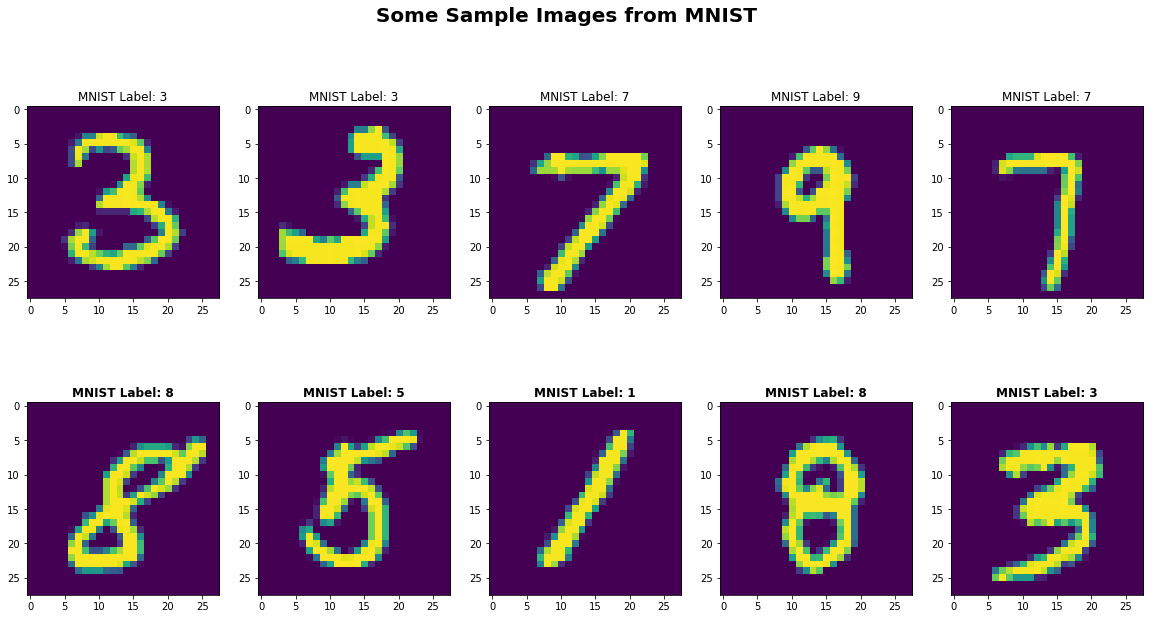

In [42]:
## Define our model 
MLR = MNIST_Logistic_Regression()

## Plot sample images
MLR.viz_training_images()


We defined our multinomial logistic model with Cross Entropy Loss above.  Let's train it now.

In [190]:
MLR.fit()

*Let's see what the accuracy on the training set.  Because we didn't define a validation set, we'll take the unorthodox step of determining classification accuracy on the entire training set (i.e. the same set on which we trained).  We get a classification accuracy of ~ 92% on the high side of what we'd get for classification accuracy on a Logistic Regression model for this data set.*

Dataset: Train 
Accuracy: 55420/60000 (92.4%)



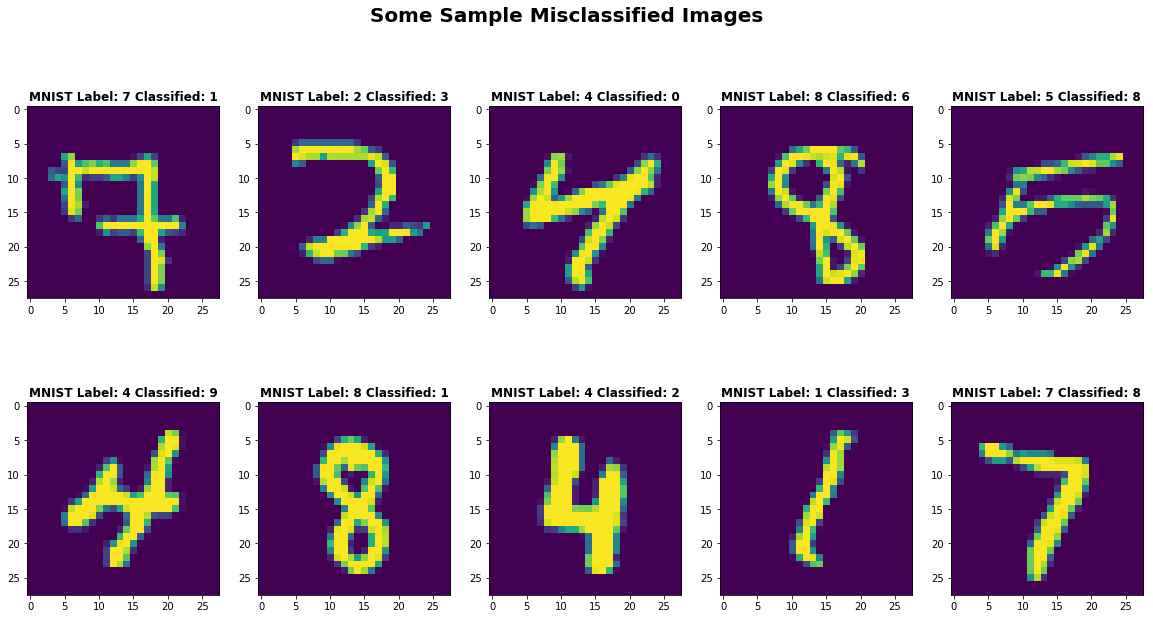

In [191]:
MLR.score("Train")

MLR.viz_misclassified_images()

*On the Test set, we also get a classification accuracy of ~ 92%.  This is similar accuracy to that which we obtained on the training set which suggests that our classification performance isn't due to overfitting.*

Dataset: Test 
Accuracy: 9222/10000 (92.2%)



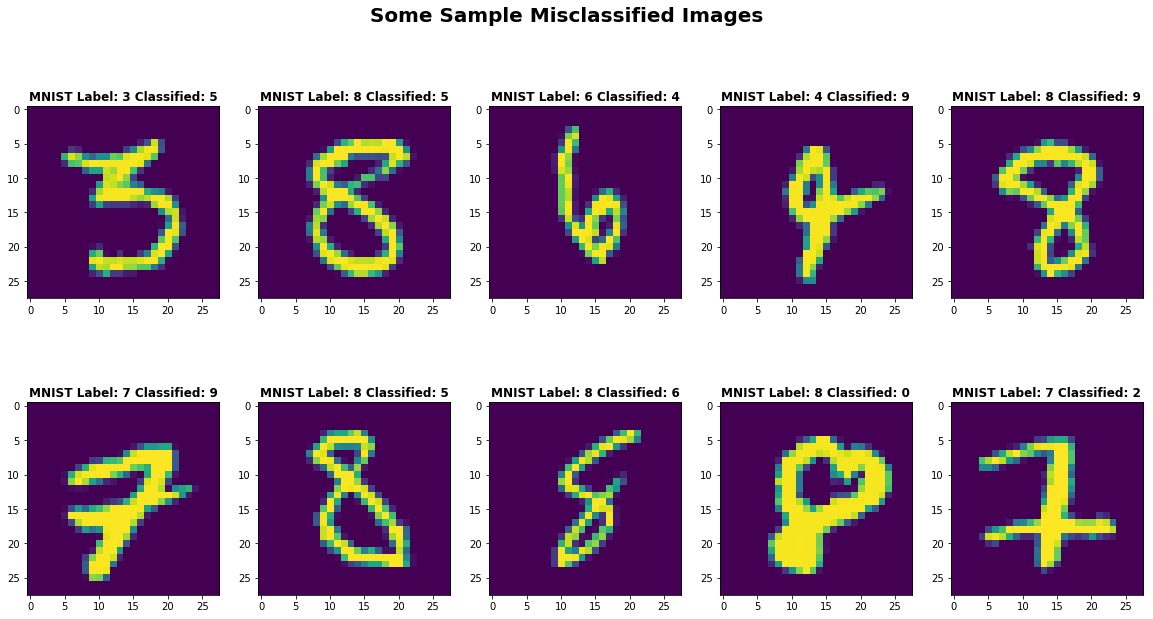

In [194]:
MLR.score("Test")

MLR.viz_misclassified_images()

A casual inspection of some of the the sample misclassified images seems to suggest that 8's, 7's and 4's make a number of appearances.  We also see a few examples of images that seem to show a bit of ambiguity which is picked up by our model.

You're done now! :-)

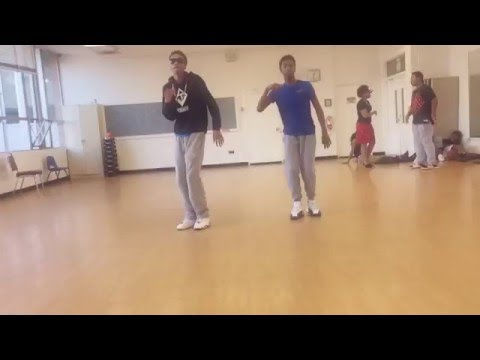

In [17]:
YouTubeVideo('iguPncD11bI')